In [1]:
from Net import Net
import torch
import torch.nn as nn
from AuxiliaryFunctions import save_checkpoint, save_recon, fig_to_img,get_plottable_frame
from VideoDataset import VideoDataset
from VideoTransforms import *
from torch.utils.data import DataLoader
from torchvision import transforms
from timeit import default_timer as timer
from datetime import datetime
import matplotlib.pyplot as plt
import os
from pathlib import Path, PureWindowsPath

In [2]:
def train(model,loader,device, num_epochs,directory, batch_size=4, learning_rate=1e-3,model_name='model',checkpoint=[]):
    torch.manual_seed(42)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate, weight_decay=1e-5)
    start_idx = 0
    running_losses=[]
    if isinstance(checkpoint,dict):
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_idx = checkpoint['epoch']
    for epoch in range(start_idx,num_epochs):
        running_loss = 0.0
        for i, data in enumerate(loader, 0):
            optimizer.zero_grad()
            clips = data['clip'].to(device)
            reconstruction = model(clips)
            loss = criterion(clips,reconstruction)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()*clips.size(0)
            if i % 1000 == 0:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, loss.item()))
        
        save_checkpoint(model,optimizer,epoch,running_loss,directory=directory,name=model_name)
        print(running_loss)
        running_losses.append(running_loss)
        save_recon(reconstruction,model_name,epoch,directory)
    return running_losses


In [3]:
directory='G:\My Drive\PhD\cut_swim_samples'#'/Volumes/GoogleDrive/My Drive/PhD/cut_swim_samples'
ds=VideoDataset(directory,num_frames=20, 
                transform=transforms.Compose([Rescale(256),ToTensor()]),swim_sample=False)
dataloader = DataLoader(ds, batch_size=4,
                        shuffle=True, num_workers=4)
len(ds)

5445

In [4]:
batch = next(iter(dataloader))
batch['clip'].shape

In [24]:

path = 'G:\My Drive\PhD\cut_swim_samples\model_outputs\model_091120_20frms_epoch316.pt'
checkpoint=torch.load(path)

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(color_channels=1)
model.to(device)
start = timer()
run_loss=train(model,dataloader,device,num_epochs=500, directory='G:\My Drive\PhD\cut_swim_samples\model_outputs' ,
               model_name='model_091120_20frms',checkpoint=checkpoint)
end = timer()
print(f'elapsed training time {end-start} sec')

[317,     1] loss: 0.013
[317,  1001] loss: 0.007
32.66747664473951
[318,     1] loss: 0.007
[318,  1001] loss: 0.008
32.76726234238595
[319,     1] loss: 0.005
[319,  1001] loss: 0.007
32.813081754837185
[320,     1] loss: 0.007
[320,  1001] loss: 0.007
32.95406344998628
[321,     1] loss: 0.006
[321,  1001] loss: 0.007
33.02774846740067
[322,     1] loss: 0.005
[322,  1001] loss: 0.007
32.853630220051855
[323,     1] loss: 0.005
[323,  1001] loss: 0.009
33.026545672211796
[324,     1] loss: 0.005
[324,  1001] loss: 0.005
32.83890663320199
[325,     1] loss: 0.005
[325,  1001] loss: 0.006
32.80183506314643
[326,     1] loss: 0.004
[326,  1001] loss: 0.006
32.88850161340088
[327,     1] loss: 0.005
[327,  1001] loss: 0.008
32.79689347697422
[328,     1] loss: 0.003
[328,  1001] loss: 0.006
32.79738889122382
[329,     1] loss: 0.005
[329,  1001] loss: 0.006
32.79790577944368
[330,     1] loss: 0.007
[330,  1001] loss: 0.006
32.77079851971939
[331,     1] loss: 0.007
[331,  1001] loss: 0

[437,  1001] loss: 0.005
33.24010368064046
[438,     1] loss: 0.007
[438,  1001] loss: 0.006
33.342025589197874
[439,     1] loss: 0.005
[439,  1001] loss: 0.006
33.45348698878661
[440,     1] loss: 0.009
[440,  1001] loss: 0.005
33.49437249219045
[441,     1] loss: 0.006
[441,  1001] loss: 0.004
33.380631738342345
[442,     1] loss: 0.005
[442,  1001] loss: 0.007
33.31991517636925
[443,     1] loss: 0.005
[443,  1001] loss: 0.006
33.36164956679568
[444,     1] loss: 0.005
[444,  1001] loss: 0.005
33.62923255749047
[445,     1] loss: 0.005
[445,  1001] loss: 0.005
33.69543340243399
[446,     1] loss: 0.006
[446,  1001] loss: 0.006
33.63098529540002
[447,     1] loss: 0.006
[447,  1001] loss: 0.008
33.536597115918994
[448,     1] loss: 0.007
[448,  1001] loss: 0.006
33.406228804495186
[449,     1] loss: 0.005
[449,  1001] loss: 0.005
33.52523221122101
[450,     1] loss: 0.009
[450,  1001] loss: 0.006
33.601014744257554
[451,     1] loss: 0.005
[451,  1001] loss: 0.007
33.66403586510569


In [14]:
device

device(type='cuda')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

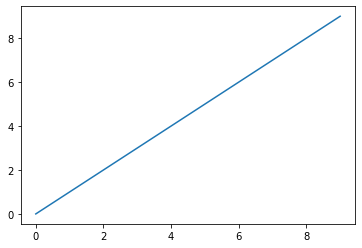

In [3]:
fig=plt.figure()
plt.plot(range(10),range(10))
fig_to_img(fig)

In [3]:
directory=str(Path('G:/My Drive/PhD/regular_vid'))#'/Volumes/GoogleDrive/My Drive/PhD/regular_vid'#
#'/Volumes/GoogleDrive/My Drive/PhD/cut_swim_samples'
ds=VideoDataset(directory,num_frames=20, 
                transform=transforms.Compose([Rescale(256),ToTensor()]),swim_sample=False)
dataloader = DataLoader(ds, batch_size=1,
                        shuffle=False, num_workers=1)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(color_channels=1)
model.to(device)
start = timer()
run_loss=train(model,dataloader,device,num_epochs=2000, directory=directory,batch_size=1,
               model_name='model_overfit_241120_20frms')
end = timer()
print(f'elapsed training time {end-start} sec')

[1,     1] loss: 0.468
0.46796637773513794
[2,     1] loss: 0.465
0.4651099145412445
[3,     1] loss: 0.462
0.46207404136657715
[4,     1] loss: 0.459
0.45869722962379456
[5,     1] loss: 0.454
0.45402443408966064
[6,     1] loss: 0.444
0.44417962431907654
[7,     1] loss: 0.418
0.41817784309387207
[8,     1] loss: 0.378
0.37811189889907837
[9,     1] loss: 0.592
0.5919914245605469
[10,     1] loss: 0.373
0.37293243408203125
[11,     1] loss: 0.382
0.38167324662208557
[12,     1] loss: 0.404
0.4036352336406708
[13,     1] loss: 0.415
0.41535770893096924
[14,     1] loss: 0.421
0.4209803342819214
[15,     1] loss: 0.423
0.42319390177726746
[16,     1] loss: 0.423
0.4233575165271759
[17,     1] loss: 0.422
0.4221843183040619
[18,     1] loss: 0.420
0.41989991068840027
[19,     1] loss: 0.417
0.41657423973083496
[20,     1] loss: 0.412
0.41204309463500977
[21,     1] loss: 0.406
0.40590864419937134
[22,     1] loss: 0.397
0.3973104655742645
[23,     1] loss: 0.385
0.3847690224647522
[24, 

0.020589224994182587
[186,     1] loss: 0.020
0.020385589450597763
[187,     1] loss: 0.020
0.020229030400514603
[188,     1] loss: 0.020
0.020183062180876732
[189,     1] loss: 0.022
0.022274324670433998
[190,     1] loss: 0.020
0.02026301994919777
[191,     1] loss: 0.022
0.0215846449136734
[192,     1] loss: 0.023
0.022501923143863678
[193,     1] loss: 0.020
0.019578808918595314
[194,     1] loss: 0.022
0.022192111238837242
[195,     1] loss: 0.021
0.021127974614501
[196,     1] loss: 0.021
0.020639965310692787
[197,     1] loss: 0.021
0.020527521148324013
[198,     1] loss: 0.020
0.01989501714706421
[199,     1] loss: 0.020
0.01978386752307415
[200,     1] loss: 0.020
0.019902247935533524
[201,     1] loss: 0.019
0.019101910293102264
[202,     1] loss: 0.020
0.019671762362122536
[203,     1] loss: 0.019
0.018789513036608696
[204,     1] loss: 0.019
0.019405901432037354
[205,     1] loss: 0.019
0.018832800909876823
[206,     1] loss: 0.019
0.01904333382844925
[207,     1] loss: 0.0

[365,     1] loss: 0.010
0.009664474986493587
[366,     1] loss: 0.010
0.009645502083003521
[367,     1] loss: 0.010
0.009609303437173367
[368,     1] loss: 0.010
0.009606679901480675
[369,     1] loss: 0.010
0.009564923122525215
[370,     1] loss: 0.010
0.009540744125843048
[371,     1] loss: 0.010
0.009523820132017136
[372,     1] loss: 0.009
0.009495266713202
[373,     1] loss: 0.009
0.009478839114308357
[374,     1] loss: 0.009
0.00945304799824953
[375,     1] loss: 0.009
0.009443448856472969
[376,     1] loss: 0.009
0.009437320753932
[377,     1] loss: 0.009
0.009424444288015366
[378,     1] loss: 0.009
0.009402808733284473
[379,     1] loss: 0.009
0.009372267872095108
[380,     1] loss: 0.009
0.009349018335342407
[381,     1] loss: 0.009
0.009331509470939636
[382,     1] loss: 0.009
0.00930495373904705
[383,     1] loss: 0.009
0.009302521124482155
[384,     1] loss: 0.009
0.009283332154154778
[385,     1] loss: 0.009
0.009241494350135326
[386,     1] loss: 0.009
0.009214132092893

0.0073596760630607605
[544,     1] loss: 0.007
0.007343744393438101
[545,     1] loss: 0.007
0.007329462096095085
[546,     1] loss: 0.007
0.00731281703338027
[547,     1] loss: 0.007
0.007297350559383631
[548,     1] loss: 0.007
0.0072946869768202305
[549,     1] loss: 0.007
0.0072824242524802685
[550,     1] loss: 0.007
0.007292779628187418
[551,     1] loss: 0.007
0.0073768701404333115
[552,     1] loss: 0.008
0.0076971035450696945
[553,     1] loss: 0.008
0.007903515361249447
[554,     1] loss: 0.008
0.007735345046967268
[555,     1] loss: 0.007
0.007363138720393181
[556,     1] loss: 0.007
0.007394198793917894
[557,     1] loss: 0.008
0.007682385854423046
[558,     1] loss: 0.007
0.007364627439528704
[559,     1] loss: 0.007
0.007309091743081808
[560,     1] loss: 0.008
0.007562817074358463
[561,     1] loss: 0.007
0.00744831096380949
[562,     1] loss: 0.007
0.007368388120085001
[563,     1] loss: 0.007
0.007448336575180292
[564,     1] loss: 0.007
0.0074135856702923775
[565,    

0.006254754960536957
[722,     1] loss: 0.006
0.006249717436730862
[723,     1] loss: 0.006
0.006242468953132629
[724,     1] loss: 0.006
0.0062335217371582985
[725,     1] loss: 0.006
0.0062373606488108635
[726,     1] loss: 0.006
0.006222955416887999
[727,     1] loss: 0.006
0.006224773358553648
[728,     1] loss: 0.006
0.006209018174558878
[729,     1] loss: 0.006
0.006197978742420673
[730,     1] loss: 0.006
0.006202102638781071
[731,     1] loss: 0.006
0.006214607041329145
[732,     1] loss: 0.006
0.006186391226947308
[733,     1] loss: 0.006
0.00618417514488101
[734,     1] loss: 0.006
0.006203886121511459
[735,     1] loss: 0.006
0.006194827612489462
[736,     1] loss: 0.006
0.0062200529500842094
[737,     1] loss: 0.006
0.006209005601704121
[738,     1] loss: 0.006
0.006189899053424597
[739,     1] loss: 0.006
0.006162089295685291
[740,     1] loss: 0.006
0.00613406440243125
[741,     1] loss: 0.006
0.006116333417594433
[742,     1] loss: 0.006
0.006112806964665651
[743,     1]

[900,     1] loss: 0.007
0.006719915196299553
[901,     1] loss: 0.007
0.006654003169387579
[902,     1] loss: 0.007
0.006688250228762627
[903,     1] loss: 0.007
0.006629438139498234
[904,     1] loss: 0.007
0.006665386725217104
[905,     1] loss: 0.007
0.0065747760236263275
[906,     1] loss: 0.007
0.006615736056119204
[907,     1] loss: 0.007
0.006532088853418827
[908,     1] loss: 0.007
0.006555179134011269
[909,     1] loss: 0.007
0.006501969415694475
[910,     1] loss: 0.007
0.006538948975503445
[911,     1] loss: 0.006
0.006488127633929253
[912,     1] loss: 0.007
0.006528152618557215
[913,     1] loss: 0.007
0.006505697034299374
[914,     1] loss: 0.006
0.006469831336289644
[915,     1] loss: 0.007
0.006501407362520695
[916,     1] loss: 0.007
0.006504833232611418
[917,     1] loss: 0.006
0.006437452044337988
[918,     1] loss: 0.006
0.006480661686509848
[919,     1] loss: 0.007
0.006634632125496864
[920,     1] loss: 0.006
0.00641673244535923
[921,     1] loss: 0.006
0.0063942

0.00586181553080678
[1077,     1] loss: 0.006
0.005856093484908342
[1078,     1] loss: 0.006
0.005847103428095579
[1079,     1] loss: 0.006
0.005834763403981924
[1080,     1] loss: 0.006
0.005828604102134705
[1081,     1] loss: 0.006
0.005818333942443132
[1082,     1] loss: 0.006
0.005813157185912132
[1083,     1] loss: 0.006
0.005814702715724707
[1084,     1] loss: 0.006
0.005801994353532791
[1085,     1] loss: 0.006
0.005824056454002857
[1086,     1] loss: 0.006
0.00596429081633687
[1087,     1] loss: 0.006
0.0058216918259859085
[1088,     1] loss: 0.006
0.005929845850914717
[1089,     1] loss: 0.006
0.005794091150164604
[1090,     1] loss: 0.006
0.005799731705337763
[1091,     1] loss: 0.006
0.005809550639241934
[1092,     1] loss: 0.006
0.0057829925790429115
[1093,     1] loss: 0.006
0.005763997323811054
[1094,     1] loss: 0.006
0.005753292702138424
[1095,     1] loss: 0.006
0.0057465992867946625
[1096,     1] loss: 0.006
0.005762457847595215
[1097,     1] loss: 0.006
0.0057310806

0.005353262647986412
[1252,     1] loss: 0.005
0.005351068452000618
[1253,     1] loss: 0.005
0.005349426064640284
[1254,     1] loss: 0.005
0.005336914211511612
[1255,     1] loss: 0.005
0.005351212341338396
[1256,     1] loss: 0.005
0.005377530120313168
[1257,     1] loss: 0.005
0.00536712072789669
[1258,     1] loss: 0.005
0.005334124900400639
[1259,     1] loss: 0.005
0.005328688770532608
[1260,     1] loss: 0.005
0.0053216032683849335
[1261,     1] loss: 0.005
0.0053049614652991295
[1262,     1] loss: 0.005
0.005300518590956926
[1263,     1] loss: 0.005
0.0052959066815674305
[1264,     1] loss: 0.005
0.005298637319356203
[1265,     1] loss: 0.005
0.005296278744935989
[1266,     1] loss: 0.005
0.005288525018841028
[1267,     1] loss: 0.005
0.0052790213376283646
[1268,     1] loss: 0.005
0.005282193422317505
[1269,     1] loss: 0.005
0.005274216644465923
[1270,     1] loss: 0.005
0.0052705020643770695
[1271,     1] loss: 0.005
0.005266963969916105
[1272,     1] loss: 0.005
0.0052611

0.00832073949277401
[1426,     1] loss: 0.007
0.007322182413190603
[1427,     1] loss: 0.007
0.007108613848686218
[1428,     1] loss: 0.008
0.0076442500576376915
[1429,     1] loss: 0.008
0.007558142300695181
[1430,     1] loss: 0.007
0.007016411051154137
[1431,     1] loss: 0.007
0.007112729828804731
[1432,     1] loss: 0.007
0.007426656782627106
[1433,     1] loss: 0.007
0.007470887154340744
[1434,     1] loss: 0.007
0.0074045611545443535
[1435,     1] loss: 0.007
0.007163770962506533
[1436,     1] loss: 0.007
0.0071993558667600155
[1437,     1] loss: 0.007
0.006843944080173969
[1438,     1] loss: 0.007
0.006823036354035139
[1439,     1] loss: 0.007
0.007010253611952066
[1440,     1] loss: 0.007
0.0067913425154984
[1441,     1] loss: 0.007
0.006647724192589521
[1442,     1] loss: 0.007
0.006827879697084427
[1443,     1] loss: 0.007
0.006780077703297138
[1444,     1] loss: 0.007
0.006603536196053028
[1445,     1] loss: 0.007
0.0066309282556176186
[1446,     1] loss: 0.007
0.0067151128

0.005469367839396
[1600,     1] loss: 0.005
0.005462742876261473
[1601,     1] loss: 0.005
0.0054602427408099174
[1602,     1] loss: 0.005
0.005460251122713089
[1603,     1] loss: 0.005
0.0054535833187401295
[1604,     1] loss: 0.005
0.005453017074614763
[1605,     1] loss: 0.005
0.0054509700275957584
[1606,     1] loss: 0.005
0.005449524614959955
[1607,     1] loss: 0.005
0.005447321105748415
[1608,     1] loss: 0.005
0.005442778579890728
[1609,     1] loss: 0.005
0.005440722685307264
[1610,     1] loss: 0.005
0.005443616770207882
[1611,     1] loss: 0.005
0.005443258676677942
[1612,     1] loss: 0.005
0.0054441033862531185
[1613,     1] loss: 0.005
0.005437501240521669
[1614,     1] loss: 0.006
0.0061454204842448235
[1615,     1] loss: 0.005
0.005436009727418423
[1616,     1] loss: 0.005
0.005425820127129555
[1617,     1] loss: 0.005
0.005423552356660366
[1618,     1] loss: 0.005
0.005412218160927296
[1619,     1] loss: 0.005
0.005403612274676561
[1620,     1] loss: 0.005
0.005404219

0.004777554888278246
[1774,     1] loss: 0.005
0.004773799795657396
[1775,     1] loss: 0.005
0.004770325496792793
[1776,     1] loss: 0.005
0.0047684297896921635
[1777,     1] loss: 0.005
0.004767696838825941
[1778,     1] loss: 0.005
0.004662114195525646
[1779,     1] loss: 0.005
0.0046563902869820595
[1780,     1] loss: 0.005
0.004652276635169983
[1781,     1] loss: 0.005
0.004640162922441959
[1782,     1] loss: 0.005
0.004632175900042057
[1783,     1] loss: 0.005
0.004642828367650509
[1784,     1] loss: 0.005
0.004660962615162134
[1785,     1] loss: 0.005
0.004767673555761576
[1786,     1] loss: 0.005
0.00476465281099081
[1787,     1] loss: 0.005
0.00477639539167285
[1788,     1] loss: 0.005
0.004767703823745251
[1789,     1] loss: 0.005
0.004763259552419186
[1790,     1] loss: 0.005
0.004760162904858589
[1791,     1] loss: 0.005
0.0047541032545268536
[1792,     1] loss: 0.005
0.004738706164062023
[1793,     1] loss: 0.005
0.004734436981379986
[1794,     1] loss: 0.005
0.0047307834

[1948,     1] loss: 0.005
0.004790191072970629
[1949,     1] loss: 0.005
0.004775935783982277
[1950,     1] loss: 0.005
0.004763840697705746
[1951,     1] loss: 0.005
0.004758595954626799
[1952,     1] loss: 0.005
0.00475584901869297
[1953,     1] loss: 0.005
0.004766062833368778
[1954,     1] loss: 0.005
0.004760990384966135
[1955,     1] loss: 0.005
0.004762960597872734
[1956,     1] loss: 0.005
0.004761240910738707
[1957,     1] loss: 0.005
0.004747211933135986
[1958,     1] loss: 0.005
0.004743583034723997
[1959,     1] loss: 0.005
0.004740579053759575
[1960,     1] loss: 0.005
0.004736702889204025
[1961,     1] loss: 0.005
0.004733467008918524
[1962,     1] loss: 0.005
0.004728558007627726
[1963,     1] loss: 0.005
0.0047284336760640144
[1964,     1] loss: 0.005
0.004722935147583485
[1965,     1] loss: 0.005
0.004722042474895716
[1966,     1] loss: 0.005
0.004716717172414064
[1967,     1] loss: 0.005
0.004712213762104511
[1968,     1] loss: 0.005
0.004719076212495565
[1969,     1]

In [34]:
for root, directories, files in os.walk(directory):
    print(root)
    print(directories)
    for filename in files:
        print(filename)

G:/My Drive/PhD/regular_vid
['New folder']
vid1.mp4
vid1.avi
G:/My Drive/PhD/regular_vid\New folder
[]


In [60]:
frame = ds[0]['clip'][1,:,:,:]
new_h, new_w = int(256*frame.shape[0]/frame.shape[1]), 256


In [61]:
new_w

256

In [74]:
frame = cv2.resize(frame, dsize=(new_w, new_h),
                               interpolation=cv2.INTER_LINEAR)

In [75]:
frame.shape

(452, 256)

In [8]:
batch=next(iter(dataloader))

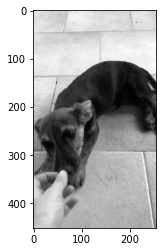

In [9]:
plt.imshow(get_plottable_frame(batch['clip'][0,:,99,:,:]),cmap='gray')

In [28]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 2466-EC75

 Directory of C:\Users\Shir\Documents\GitHub\video_autoencoder

24/11/2020  16:12    <DIR>          .
24/11/2020  16:12    <DIR>          ..
22/11/2020  23:49             1,928 .gitignore
22/11/2020  23:49    <DIR>          .idea
22/11/2020  23:53    <DIR>          .ipynb_checkpoints
23/11/2020  11:09             4,374 AuxiliaryFunctions.py
22/11/2020  23:49             2,538 Net.py
22/11/2020  23:49                79 README.md
24/11/2020  16:12            38,449 TrainingNotebook.ipynb
22/11/2020  23:49             2,859 VideoDataset.py
22/11/2020  23:49             2,280 VideoTransforms.py
24/11/2020  14:10    <DIR>          __pycache__
               7 File(s)         52,507 bytes
               5 Dir(s)  181,220,077,568 bytes free


In [22]:
vid1=cv2.VideoCapture(os.path.join(directory,'vid1.avi'))
fourcc = cv2.VideoWriter_fourcc(*"MJPG")
vid_writer = cv2.VideoWriter(os.path.join(directory,'vid2.avi'), fourcc, 30,
                                     (int(vid1.get(cv2.CAP_PROP_FRAME_WIDTH)), int(vid1.get(cv2.CAP_PROP_FRAME_HEIGHT))), True)
for i in range(150):
    ret,frame = vid1.read()


In [24]:
while ret:
    ret,frame = vid1.read()
    vid_writer.write(frame)
vid1.release()
vid_writer.release()

In [13]:
vid1=cv2.VideoCapture(os.path.join(directory,'vid2.avi'))

In [19]:
samp=ds[0]['clip'].to(device)
samp = samp[np.newaxis,:,:,:,:]

In [20]:
with torch.no_grad():
    recon = model(samp)

In [30]:
clip=recon.cpu()

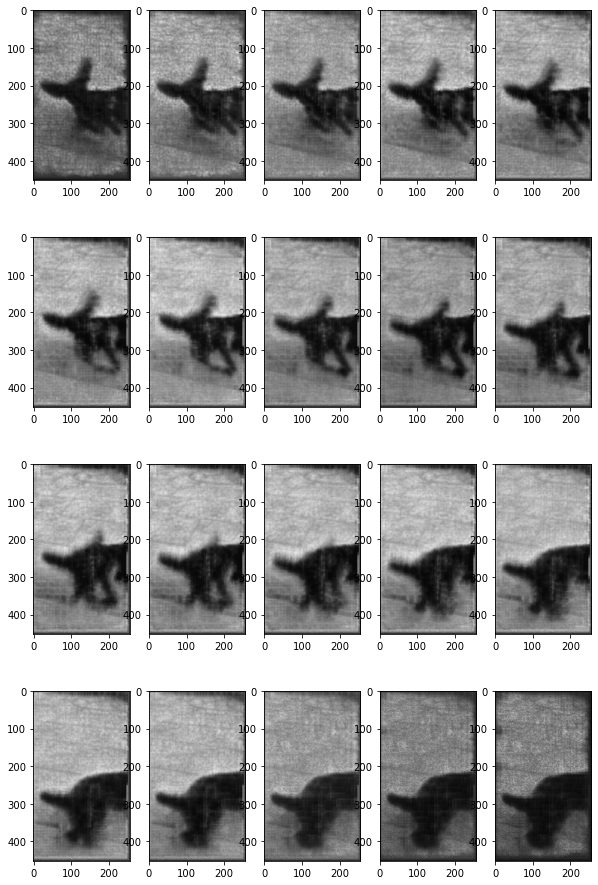

In [35]:
plt.figure(figsize=(10,16))
for i in range(1,clip.shape[2]+1):
    plt.subplot(4,5,i)
    plt.imshow(get_plottable_frame(clip[0,:,i-1,:,:]),cmap='gray')